In [186]:
import pandas as pd
import numpy as np
import re, urllib.parse, matplotlib
import matplotlib.pyplot as plt
import seaborn as sns 
# import pgeocode
# import geopandas
# import pandas_bokeh
# import matplotlib.pyplot as plt
# pandas_bokeh.output_notebook()
import folium
from folium import plugins

In [187]:
df = pd.read_csv("clean_data.csv", low_memory=False)
df.head()

,id,Locality,Zip,Type of property,Subtype of property,Type of sale,Price,Building condition,Building Cond. values,Number of facades,...,Kitchen values,Surface of the land,Primary energy consumption,Energy_classes,Terrace,Terrace surface,Garden,Garden surface,Open fire,Swimming pool
0,10578809,liedekerke,1770,house,house,for sale,349000,As new,4,2.0,...,3,256.0,241,5,1,25.0,1,150.0,0.0,0.0
1,10578941,sint-andries,8200,house,house,for sale,625000,As new,4,3.0,...,3,539.0,292,5,0,0.0,1,400.0,0.0,0.0
2,10577515,seraing,4100,house,house,for sale,149000,Good,3,2.0,...,2,105.0,469,3,1,NaN,1,25.0,0.0,0.0
3,10577846,andenne,5300,house,house,for sale,335000,Good,3,4.0,...,1,2185.0,196,6,1,NaN,1,NaN,0.0,0.0
4,10523130,forest,1190,house,house,for sale,545000,To be done up,2,2.0,...,1,260.0,517,2,1,45.0,0,0.0,0.0,0.0


In [188]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18030 entries, 0 to 18029
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          18030 non-null  int64  
 1   Locality                    18030 non-null  object 
 2   Zip                         18030 non-null  int64  
 3   Type of property            18030 non-null  object 
 4   Subtype of property         18030 non-null  object 
 5   Type of sale                18030 non-null  object 
 6   Price                       18030 non-null  int64  
 7   Building condition          15187 non-null  object 
 8   Building Cond. values       18030 non-null  int64  
 9   Number of facades           13828 non-null  float64
 10  Number of rooms             17699 non-null  float64
 11  Living area                 18030 non-null  float64
 12  Furnished                   18030 non-null  float64
 13  Fully equipped kitchen      140

In [189]:
house_target = ['Price','Living area','Number of rooms','Furnished','Garden','Terrace','Open fire','Surface of the land','Number of facades','Swimming pool','Building Cond. values','Kitchen values','Primary energy consumption']
apartment_target = ['Price','Living area','Number of rooms','Furnished','Open fire','Building Cond. values','Kitchen values','Primary energy consumption']

In [190]:
house_target_data = df[df["Type of property"]=="house"][house_target]
house_target_data.corr(method="spearman")

,Price,Living area,Number of rooms,Furnished,Garden,Terrace,Open fire,Surface of the land,Number of facades,Swimming pool,Building Cond. values,Kitchen values,Primary energy consumption
Price,1.000000,0.708811,0.526919,0.009590,0.057048,0.140829,0.188644,0.421041,0.303484,0.260953,0.267317,0.190946,-0.332577
Living area,0.708811,1.000000,0.653311,-0.010263,0.011333,0.076107,0.166876,0.419429,0.229320,0.222062,0.138196,0.087594,-0.214579
Number of rooms,0.526919,0.653311,1.000000,0.008830,0.044414,0.065497,0.100298,0.254589,0.130046,0.158345,0.080063,0.061367,-0.141007
Furnished,0.009590,-0.010263,0.008830,1.000000,-0.001870,0.010069,-0.012361,-0.018284,0.002399,0.036687,0.031727,0.026043,-0.016620
Garden,0.057048,0.011333,0.044414,-0.001870,1.000000,0.124474,0.099096,0.161334,0.072593,0.002780,0.043897,0.065031,0.013628
Terrace,0.140829,0.076107,0.065497,0.010069,0.124474,1.000000,0.022148,0.082954,0.083282,0.086341,0.170922,0.195941,-0.096580
Open fire,0.188644,0.166876,0.100298,-0.012361,0.099096,0.022148,1.000000,0.200504,0.198667,0.077916,0.025335,0.032264,-0.039269
Surface of the land,0.421041,0.419429,0.254589,-0.018284,0.161334,0.082954,0.200504,1.000000,0.722604,0.253196,0.033731,0.039304,0.038587
Number of facades,0.303484,0.229320,0.130046,0.002399,0.072593,0.083282,0.198667,0.722604,1.000000,0.215351,0.068958,0.064878,0.041344
Swimming pool,0.260953,0.222062,0.158345,0.036687,0.002780,0.086341,0.077916,0.253196,0.215351,1.000000,0.133699,0.114586,-0.104210


In [191]:
house_target_data.describe()

,Price,Living area,Number of rooms,Furnished,Garden,Terrace,Open fire,Surface of the land,Number of facades,Swimming pool,Building Cond. values,Kitchen values,Primary energy consumption
count,9.539000e+03,9539.000000,9474.000000,9539.000000,9539.000000,9539.000000,9539.000000,9045.000000,8356.000000,9539.000000,9539.000000,9539.000000,9539.000000
mean,5.539761e+05,255.255268,3.798501,0.018555,0.582975,0.689276,0.093825,1408.466777,2.991503,0.049481,2.358318,1.076738,374.147919
std,6.650943e+05,1811.083053,1.716173,0.134956,0.493093,0.462814,0.329418,8067.571846,0.873055,0.216882,1.496108,1.347934,1496.913984
min,1.000000e+04,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,-1.000000,-1.000000,-1.000000
25%,2.590000e+05,145.000000,3.000000,0.000000,0.000000,0.000000,0.000000,209.000000,2.000000,0.000000,2.000000,0.000000,189.000000
50%,3.860000e+05,190.000000,3.000000,0.000000,1.000000,1.000000,0.000000,463.000000,3.000000,0.000000,3.000000,1.000000,301.000000
75%,5.950000e+05,268.000000,4.000000,0.000000,1.000000,1.000000,0.000000,1000.000000,4.000000,0.000000,3.000000,2.000000,443.000000
max,1.100000e+07,175173.000000,30.000000,1.000000,1.000000,1.000000,10.000000,500000.000000,10.000000,1.000000,4.000000,3.000000,83408.000000


<Axes: >

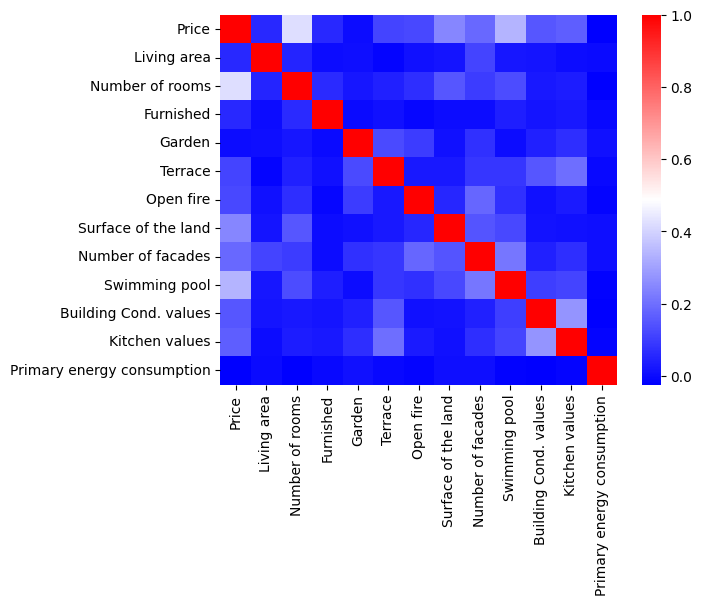

In [192]:
plt.figure()
sns.heatmap(house_target_data.corr(), cmap="bwr", annot=False)

<Figure size 4000x3000 with 0 Axes>

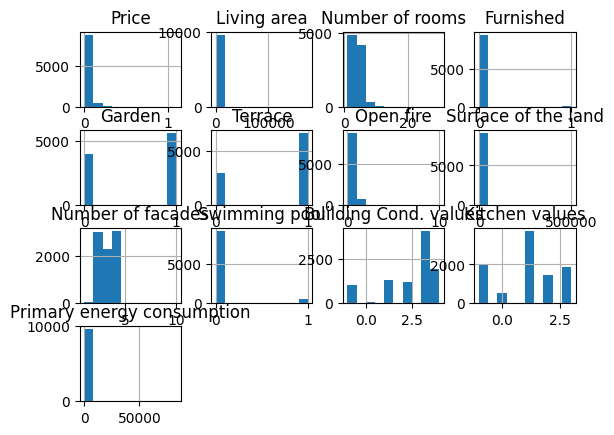

In [193]:
# plt.figure(figsize=(40,30))
# house_target_data.hist()
# plt.show()

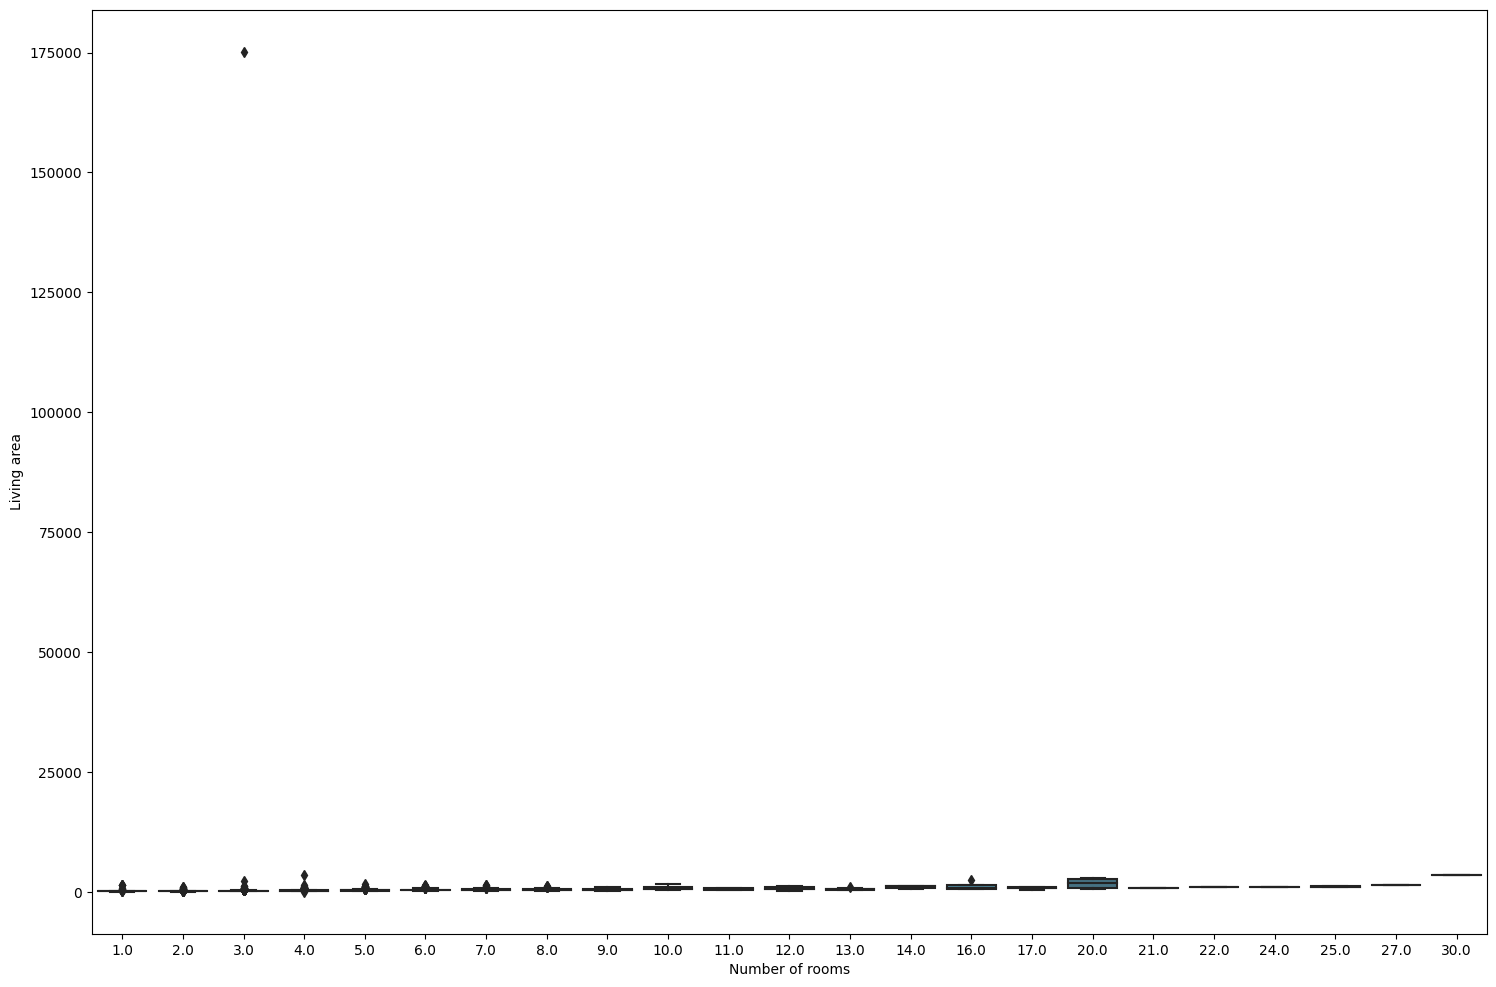

In [194]:
# plt.figure (figsize= (18,12))
# sns.boxplot(x=house_target_data["Number of rooms"], y= house_target_data["Living area"], palette= "GnBu_d")

# plt.show()

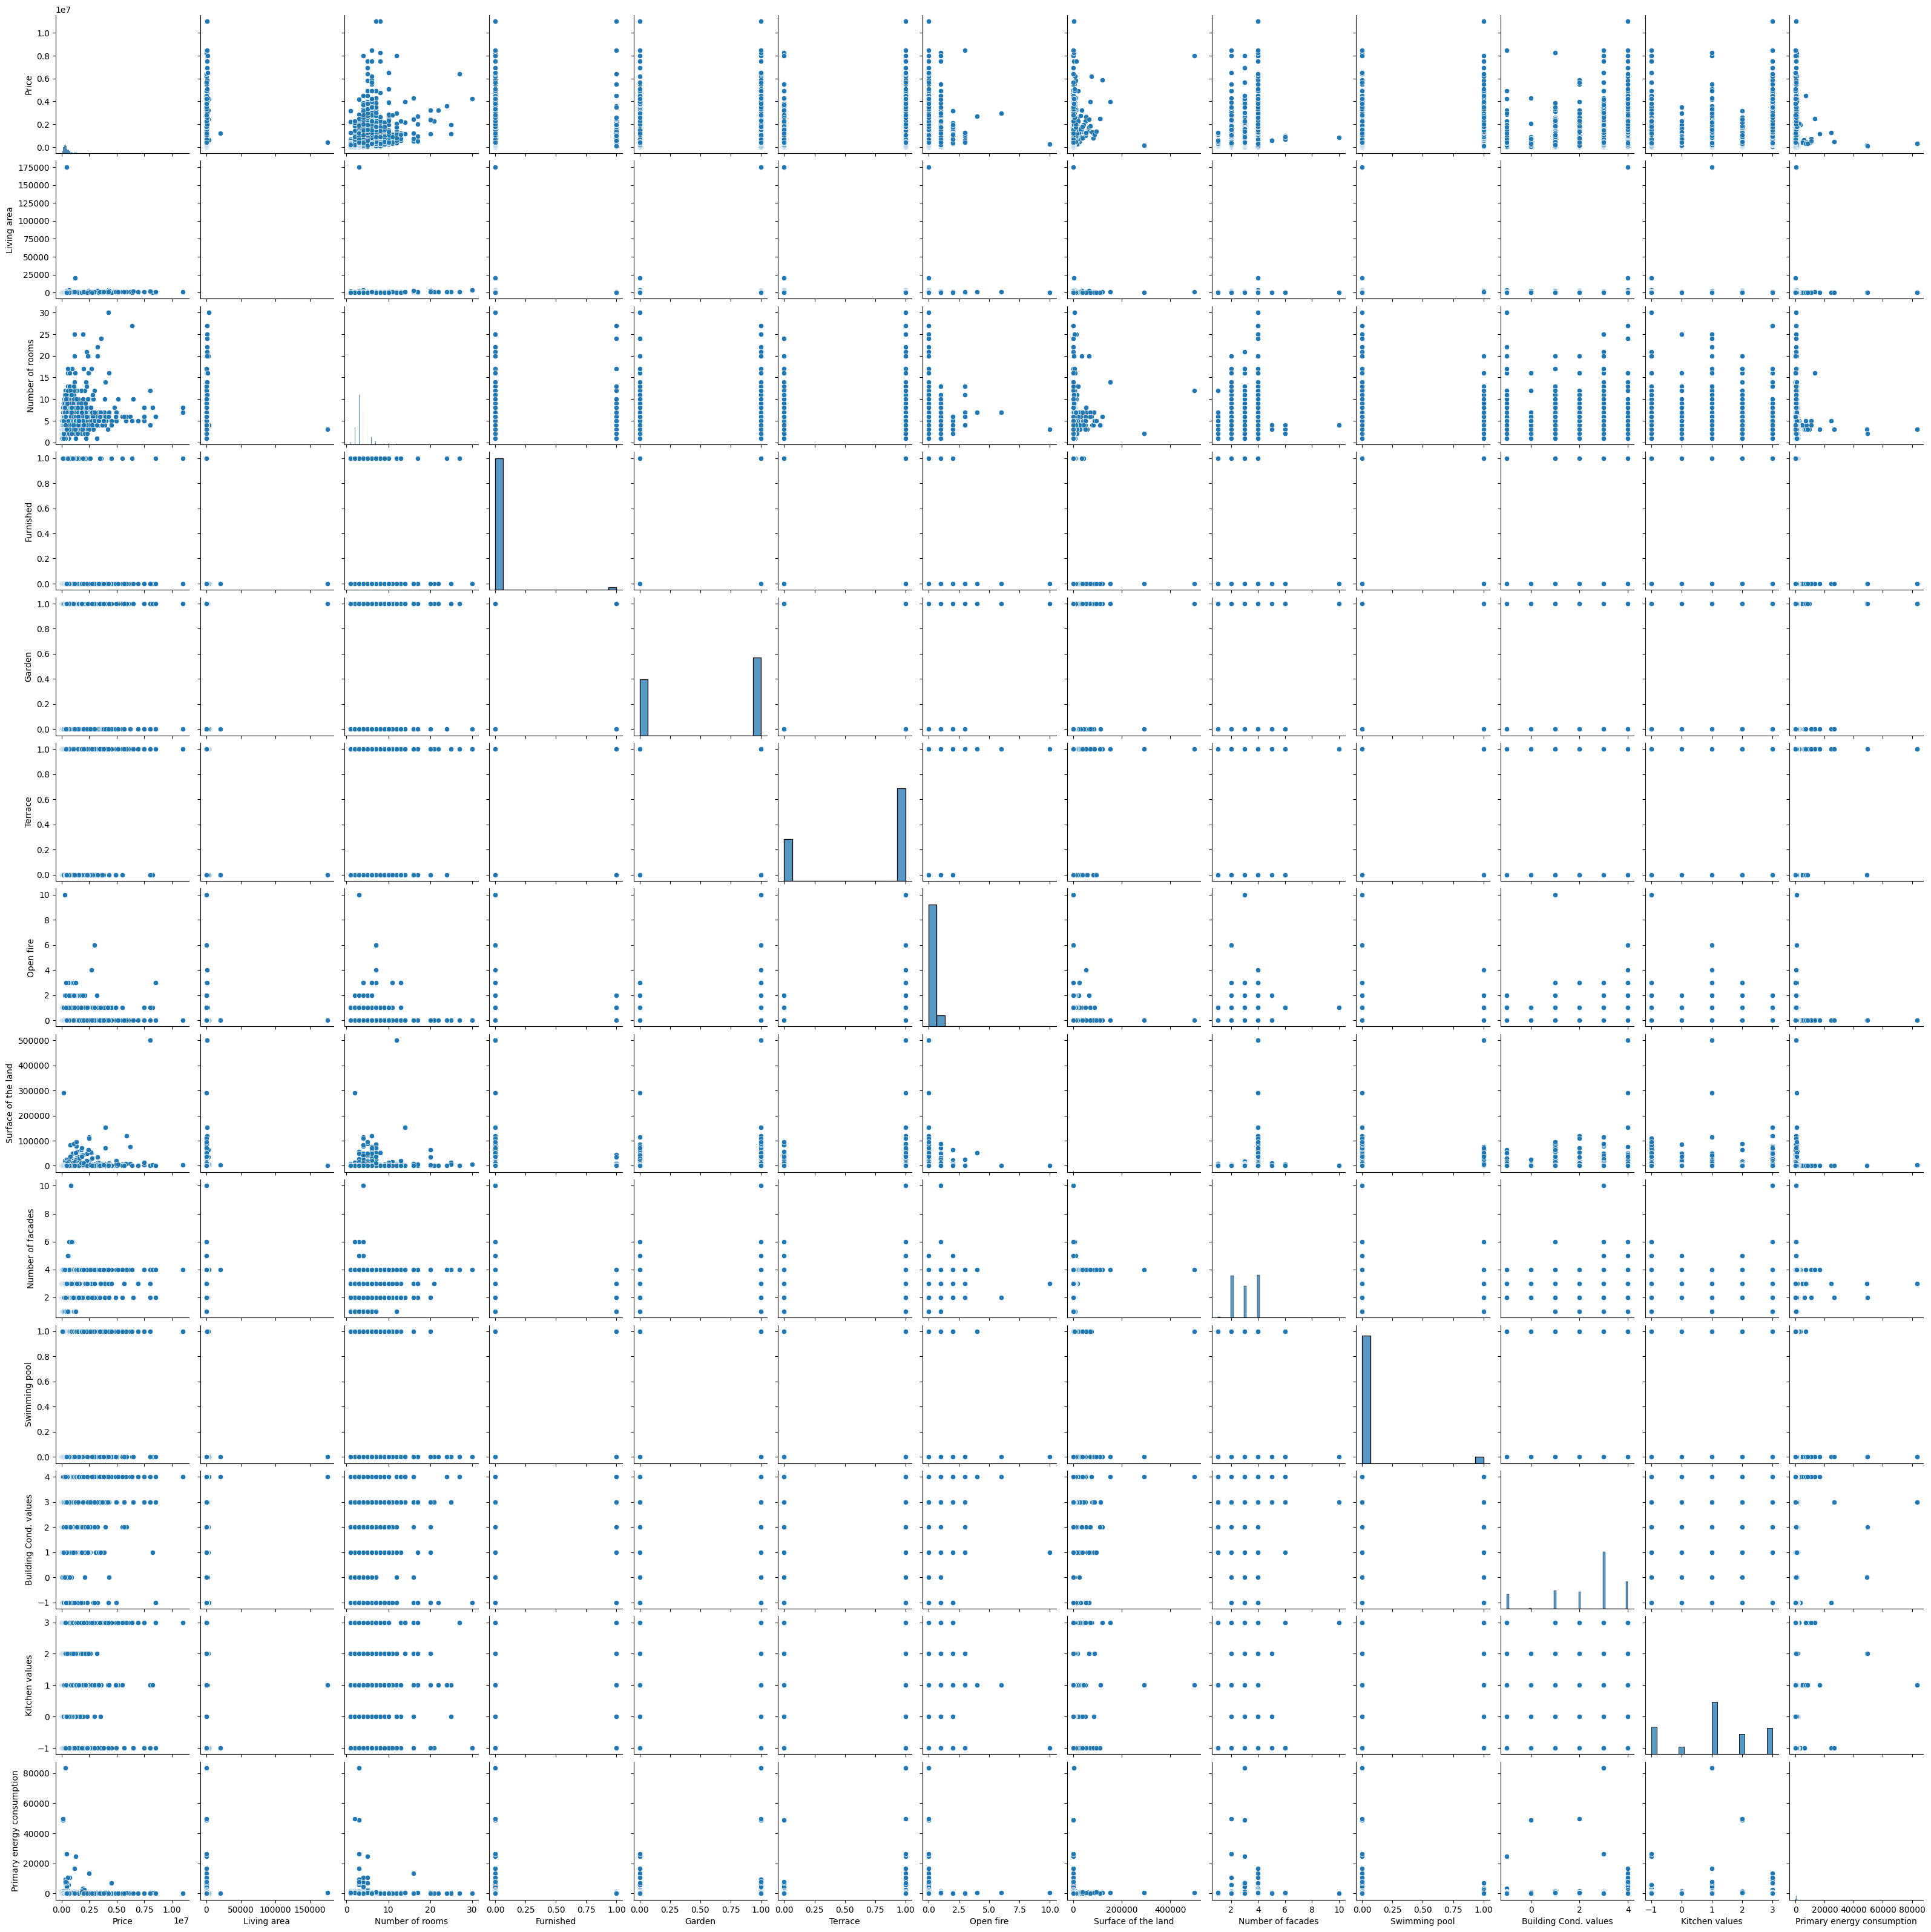

In [195]:
# sns.pairplot(house_target_data)

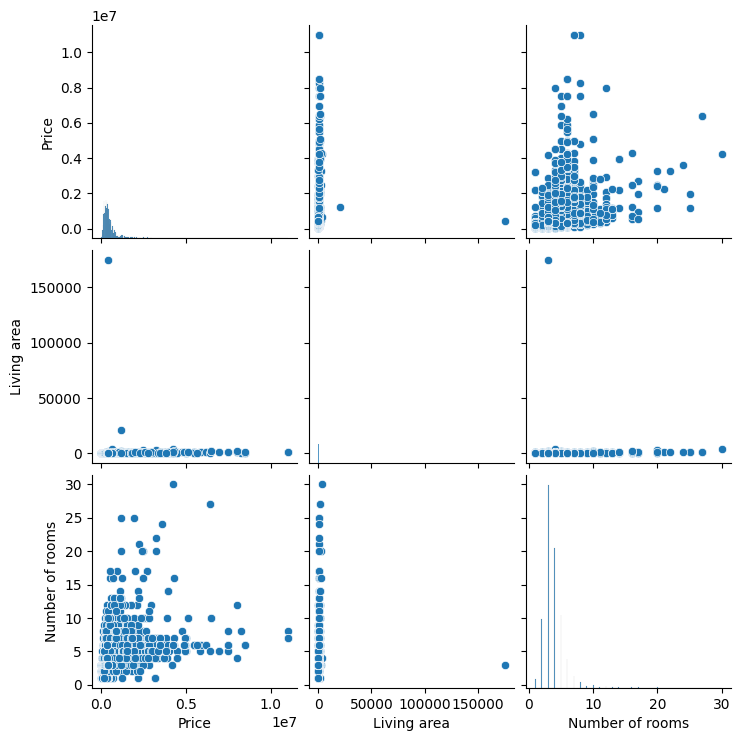

In [196]:
# sns.pairplot(house_target_data[["Price","Living area","Number of rooms"]])

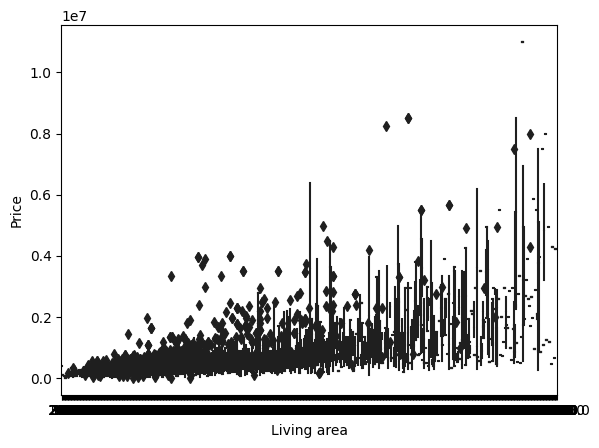

In [197]:
# sns.boxplot(x=house_target_data["Living area"], y=house_target_data["Price"] , palette= "GnBu_d")
plt.show()

In [198]:
# zip_df = pd.read_csv("zipcode-belgium.csv", names=["Zip","location","long","lat"])
# house_target = ['Price','Living area','Number of rooms','Furnished','Garden','Terrace','Open fire','Surface of the land','Number of facades','Swimming pool','Building Cond. values','Kitchen values','Primary energy consumption',"Zip"]
# house_df = df[df["Type of property"]=="house"][house_target]
# house_df = house_df.merge(zip_df, on='Zip', how='left')

In [199]:
# def get_center_latlong(df):
#     # get the center of my map for plotting
#     centerlat = (zip_df['lat'].max() + zip_df['lat'].min()) / 2
#     centerlong = (zip_df['long'].max() + zip_df['long'].min()) / 2
#     return centerlat, centerlong

# center = get_center_latlong(df)
# m = folium.Map(location=center, zoom_start=10)
# # m.save('circle_map.html')

# # go through each home in set, make circle, and add to map.
# for i in range(len(df)):
#     folium.Circle(
#         location=[df.iloc[i]['lat'], df.iloc[i]['long']],
#         radius=10,
#         fill=True,
#         fill_opacity=0.2
#     ).add_to(m)
        
# m.save('circle_map.html')

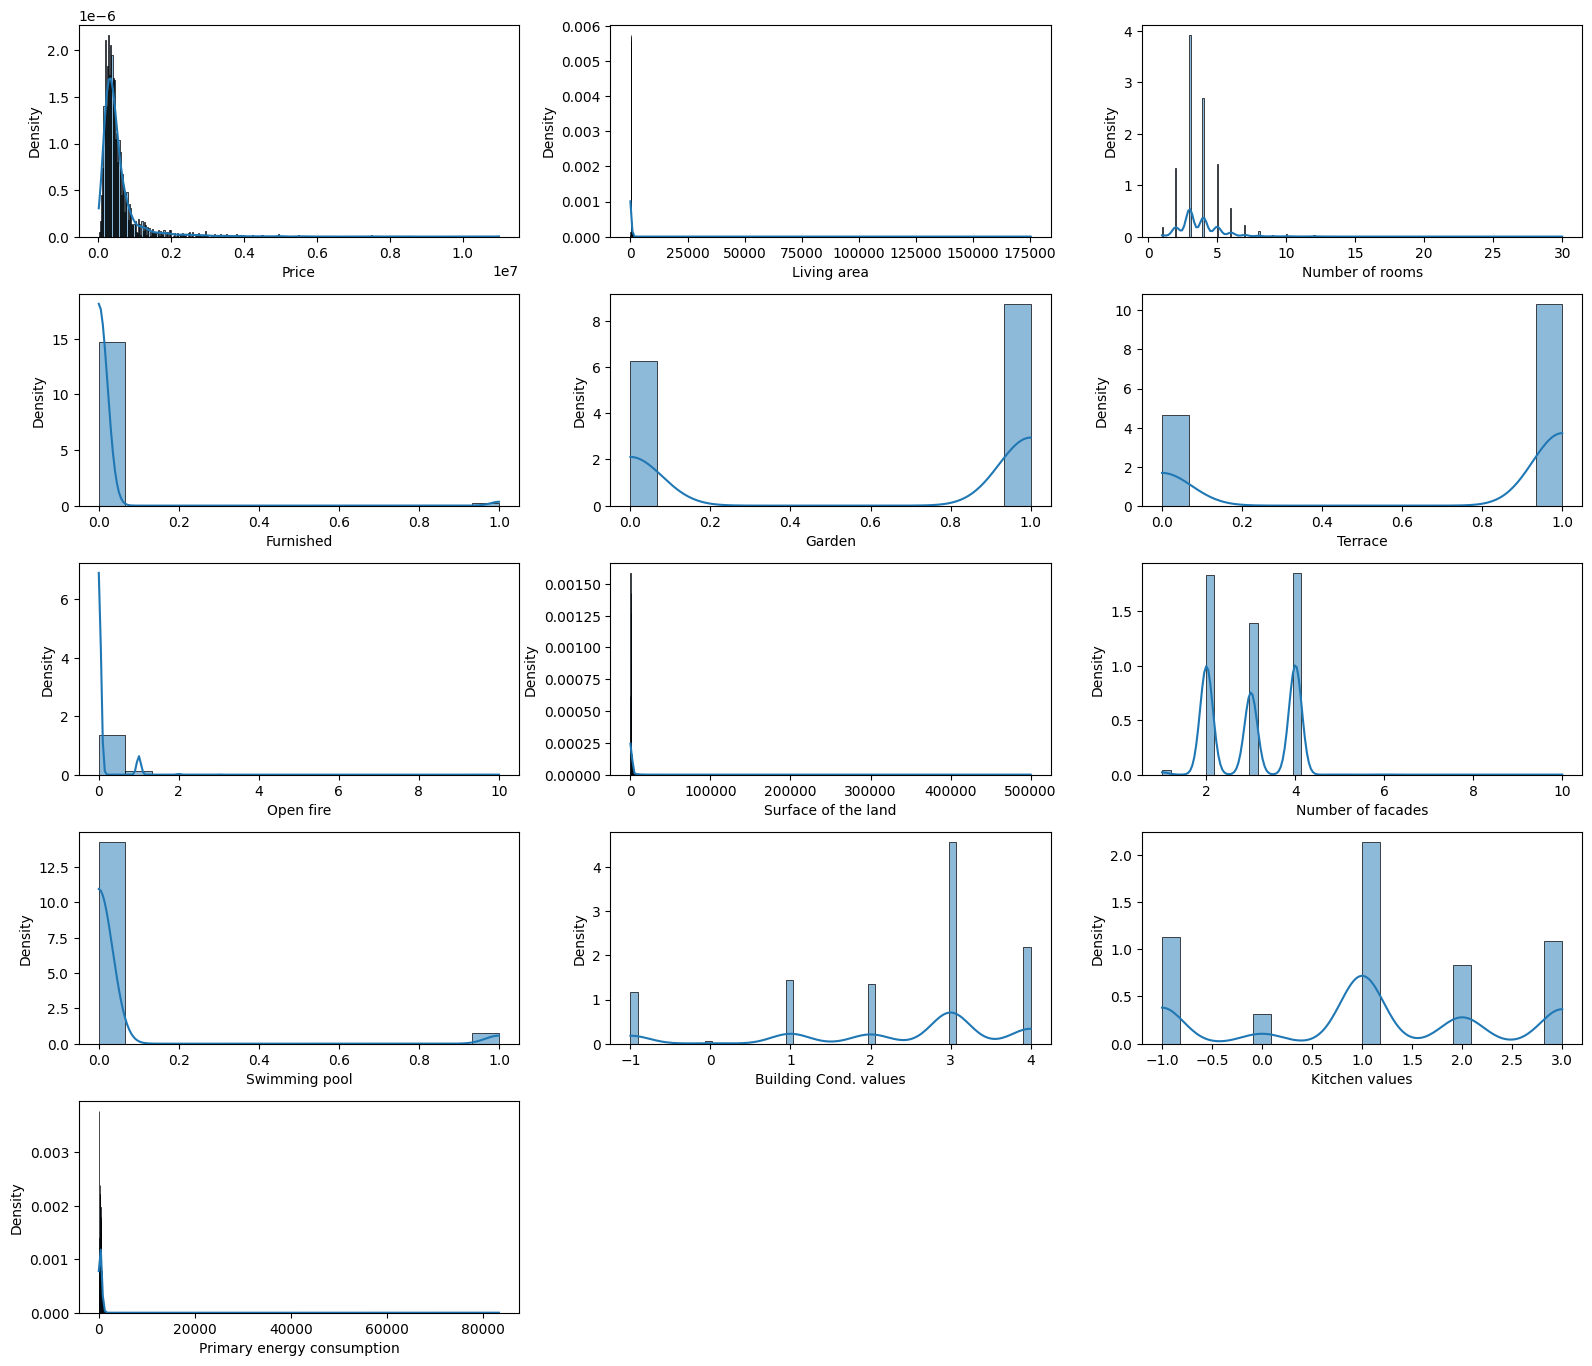

In [201]:
fig = plt.figure(figsize=(16,16))
for index,col in enumerate(house_target_data):
    plt.subplot(6,3,index+1)
    sns.histplot(house_target_data.loc[:,col].dropna(), kde=True, stat="density", linewidth=0.5);
fig.tight_layout(pad=1.0)

In [202]:
house_target_data.groupby("Number of facades").agg("count")

,Price,Living area,Number of rooms,Furnished,Garden,Terrace,Open fire,Surface of the land,Swimming pool,Building Cond. values,Kitchen values,Primary energy consumption
Number of facades,,,,,,,,,,,,
1.0,64,64,64,64,64,64,64,63,64,64,64,64
2.0,2992,2992,2955,2992,2992,2992,2992,2757,2992,2992,2992,2992
3.0,2268,2268,2256,2268,2268,2268,2268,2135,2268,2268,2268,2268
4.0,3024,3024,3015,3024,3024,3024,3024,2965,3024,3024,3024,3024
5.0,3,3,3,3,3,3,3,3,3,3,3,3
6.0,4,4,4,4,4,4,4,3,4,4,4,4
10.0,1,1,1,1,1,1,1,1,1,1,1,1


In [184]:
house_target_data.drop(house_target_data[house_target_data['Number of facades'] >= 5].index, inplace = True)

In [212]:
house_target_data.groupby("Number of rooms")["Price"].agg([min,max,sum])

,min,max,sum
Number of rooms,,,
1.0,25000,3200000,48135299
2.0,10000,2300000,312225344
3.0,16000,4200000,1328256666
4.0,45000,8000000,1312030281
5.0,65000,7500000,1077427340
6.0,99000,8500000,562067754
7.0,99000,11000000,239708699
8.0,115000,11000000,114778445
9.0,185000,2175000,32239000
